In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("netflix_titles.csv")

In [11]:
nf = df.copy()

In [13]:
nf.shape

(8807, 12)

In [15]:
nf.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
nf.dropna(subset=["date_added", "rating",'duration'],inplace=True)

In [19]:
nf.shape

(8790, 12)

In [21]:
nf.nunique()

show_id         8790
type               2
title           8790
director        4526
cast            7678
country          748
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

In [23]:
nf["type"].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

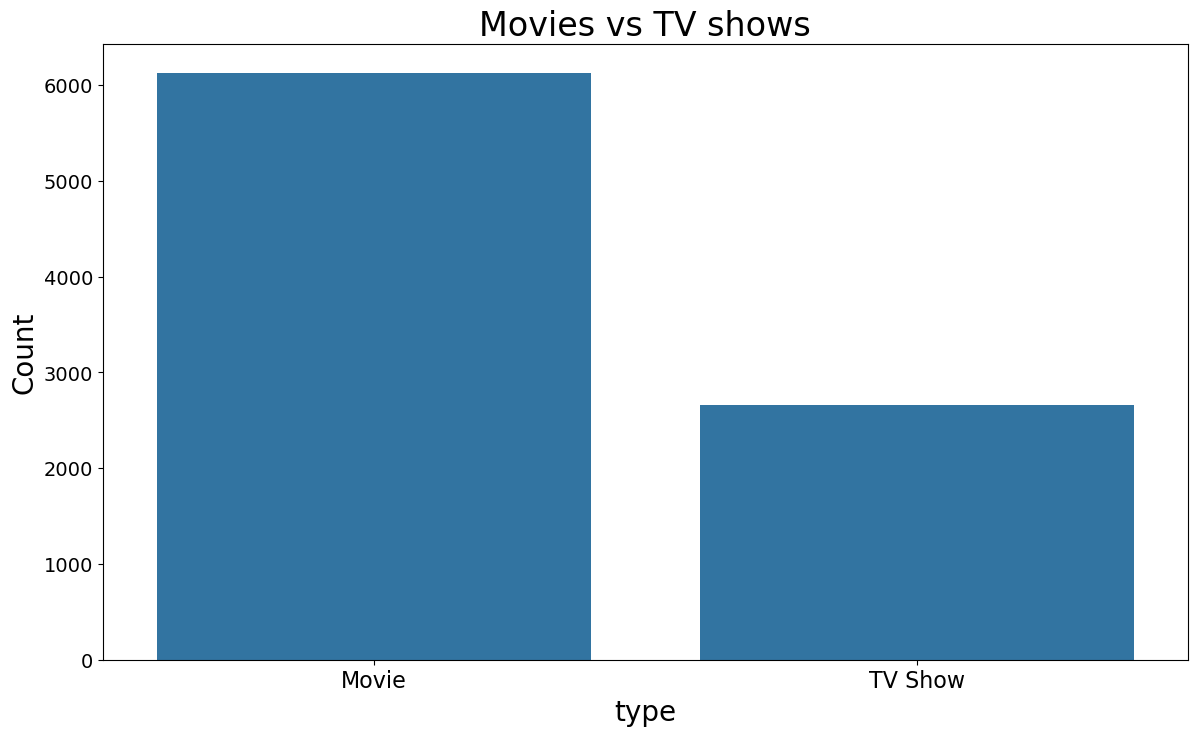

In [247]:
plt.figure(figsize=(14,8))
sns.countplot(x=nf['type'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Movies vs TV shows",fontsize=24)
plt.show()

In [25]:
nf.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [27]:
# nf["date_added"]=pd.to_datetime(nf["date_added"])
nf["date_added"] = pd.to_datetime(nf["date_added"], format='%B %d, %Y', errors='coerce')

In [29]:
nf["year"]=nf["date_added"].dt.year
nf["month"]=nf["date_added"].dt.month_name()
nf["weekday"]=nf["date_added"].dt.day_name()

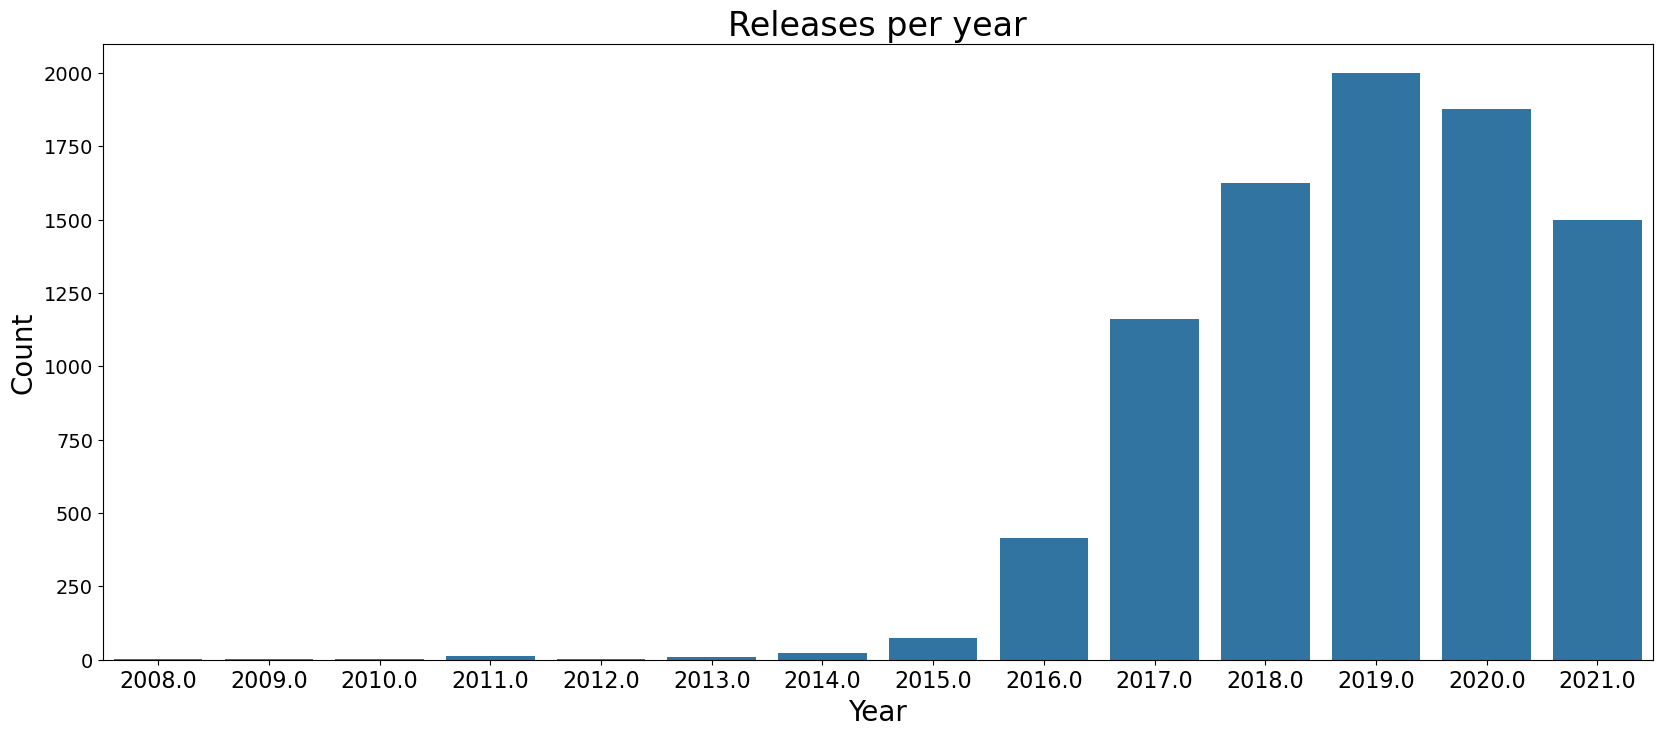

In [275]:
plt.figure(figsize=(20,8))
sns.countplot(data=nf,x="year")
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Releases per year",fontsize=24)
plt.show()

In [31]:
year_count=nf.groupby(["year","type"]).size().reset_index()


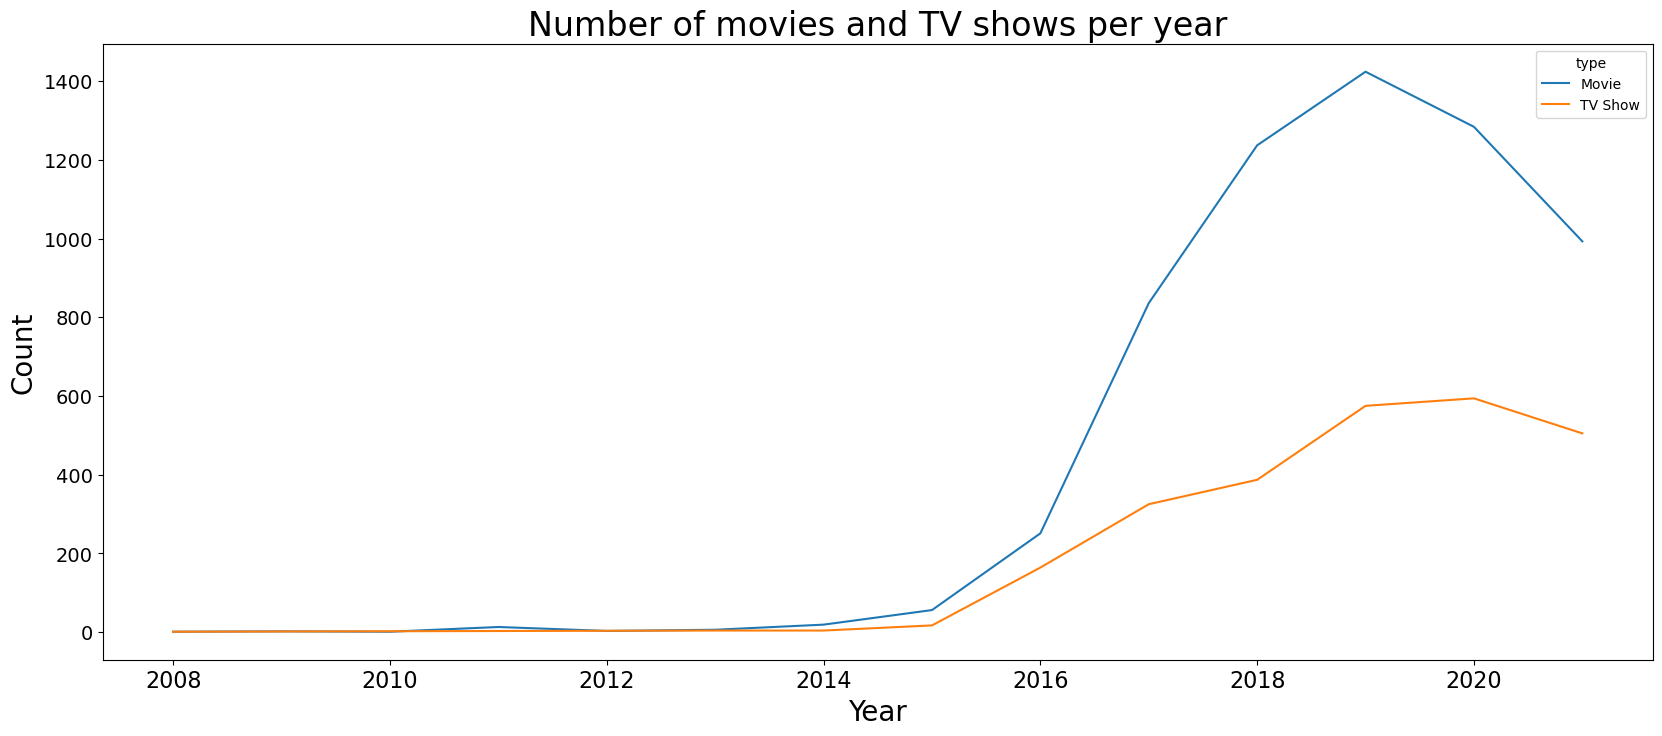

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(x=year_count["year"],y=year_count[0],hue=year_count["type"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of movies and TV shows per year",fontsize=24)
plt.show()

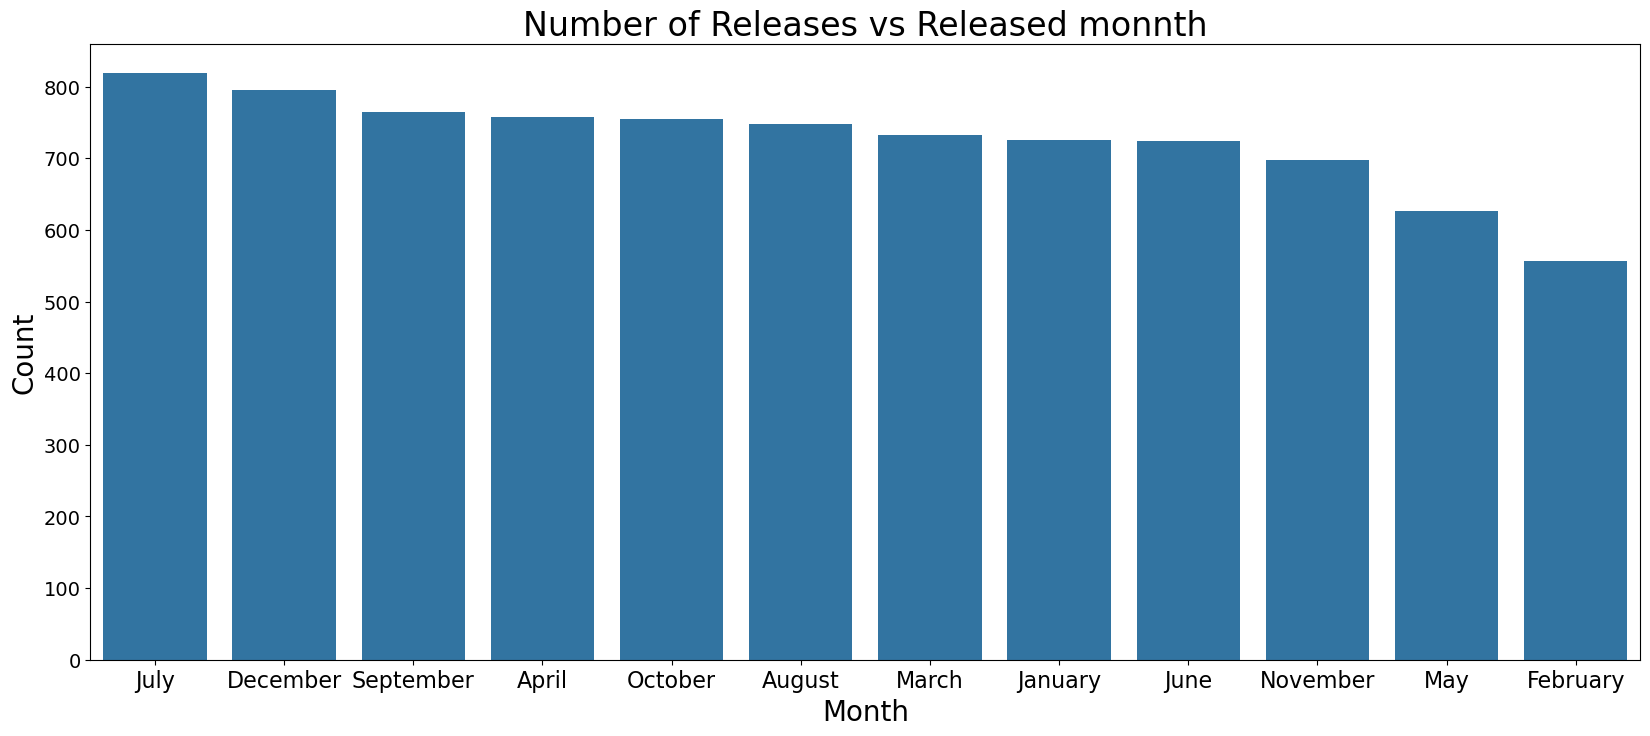

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(data=nf,x="month",order=nf["month"].value_counts().index)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of Releases vs Released monnth",fontsize=24)
plt.show()

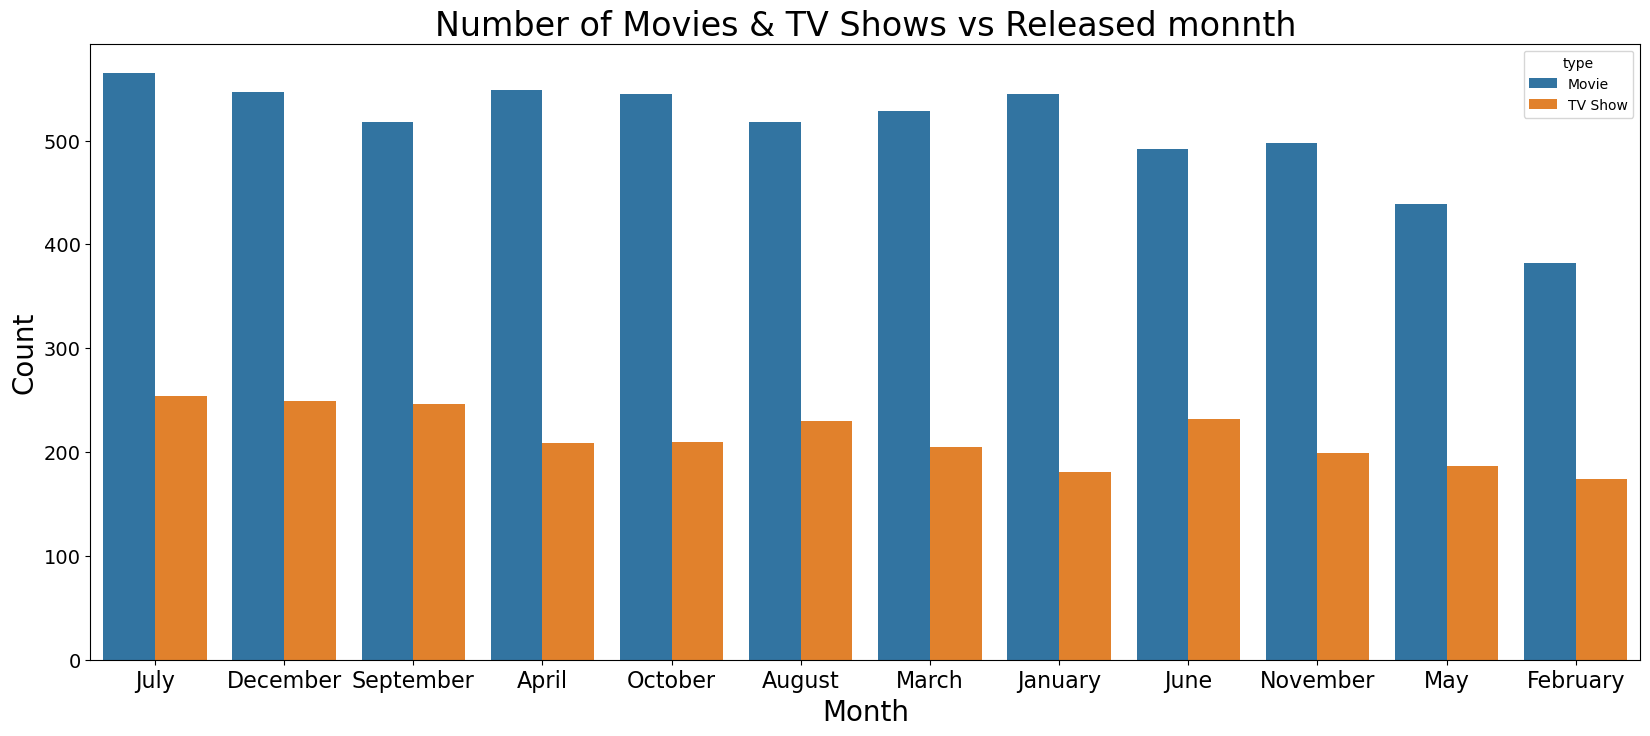

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data=nf,x="month",order=nf["month"].value_counts().index,hue="type")
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of Movies & TV Shows vs Released monnth",fontsize=24)
plt.show()

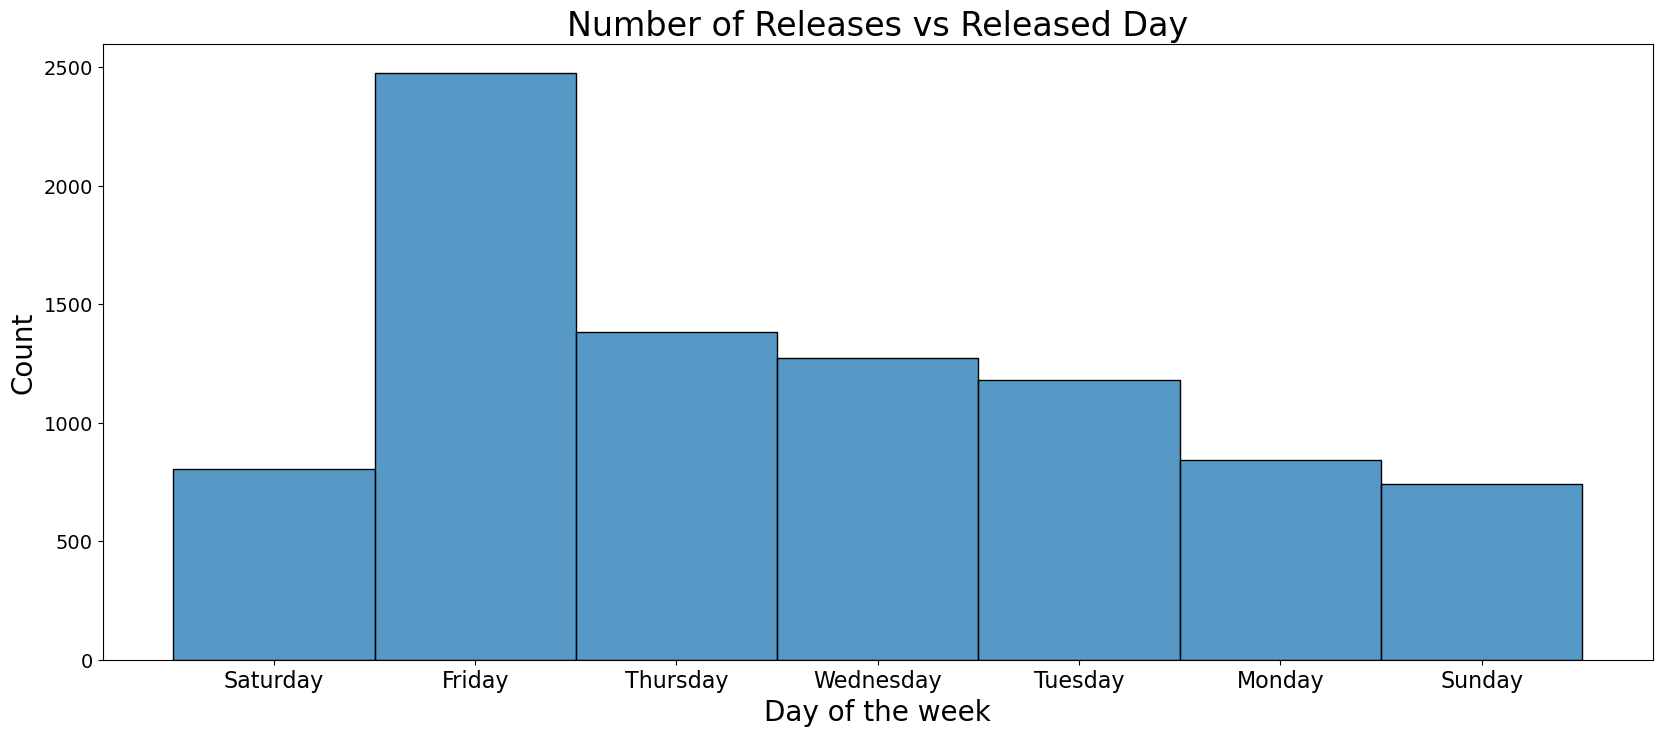

In [39]:
plt.figure(figsize=(20,8))
sns.histplot(data=nf,x="weekday")
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Day of the week",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of Releases vs Released Day",fontsize=24)
plt.show()

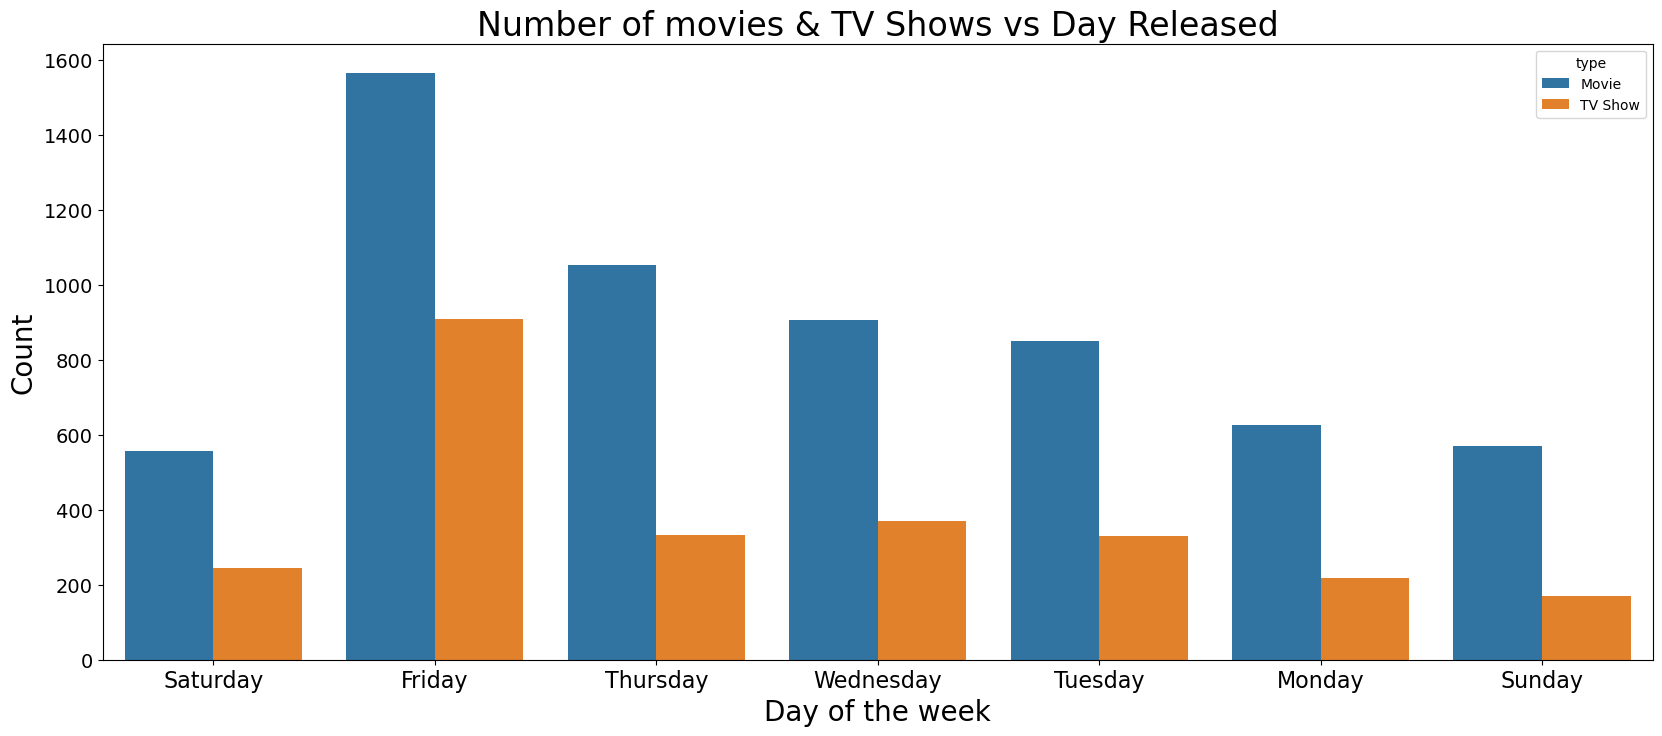

In [287]:
plt.figure(figsize=(20,8))
sns.countplot(data=nf,x="weekday",hue="type")
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Day of the week",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Number of movies & TV Shows vs Day Released",fontsize=24)
plt.show()

In [41]:
g = nf["release_year"].value_counts()
g.head()

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
Name: count, dtype: int64

In [43]:
g.index

Index([2018, 2017, 2019, 2020, 2016, 2021, 2015, 2014, 2013, 2012, 2010, 2011,
       2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2001, 1999, 1997, 2000,
       1998, 1993, 1995, 1996, 1992, 1994, 1990, 1988, 1982, 1991, 1989, 1981,
       1986, 1984, 1980, 1979, 1983, 1985, 1973, 1976, 1987, 1977, 1974, 1975,
       1978, 1972, 1967, 1971, 1960, 1945, 1944, 1955, 1968, 1962, 1943, 1958,
       1964, 1969, 1970, 1963, 1956, 1965, 1946, 1942, 1954, 1959, 1925, 1961,
       1947, 1966],
      dtype='int64', name='release_year')

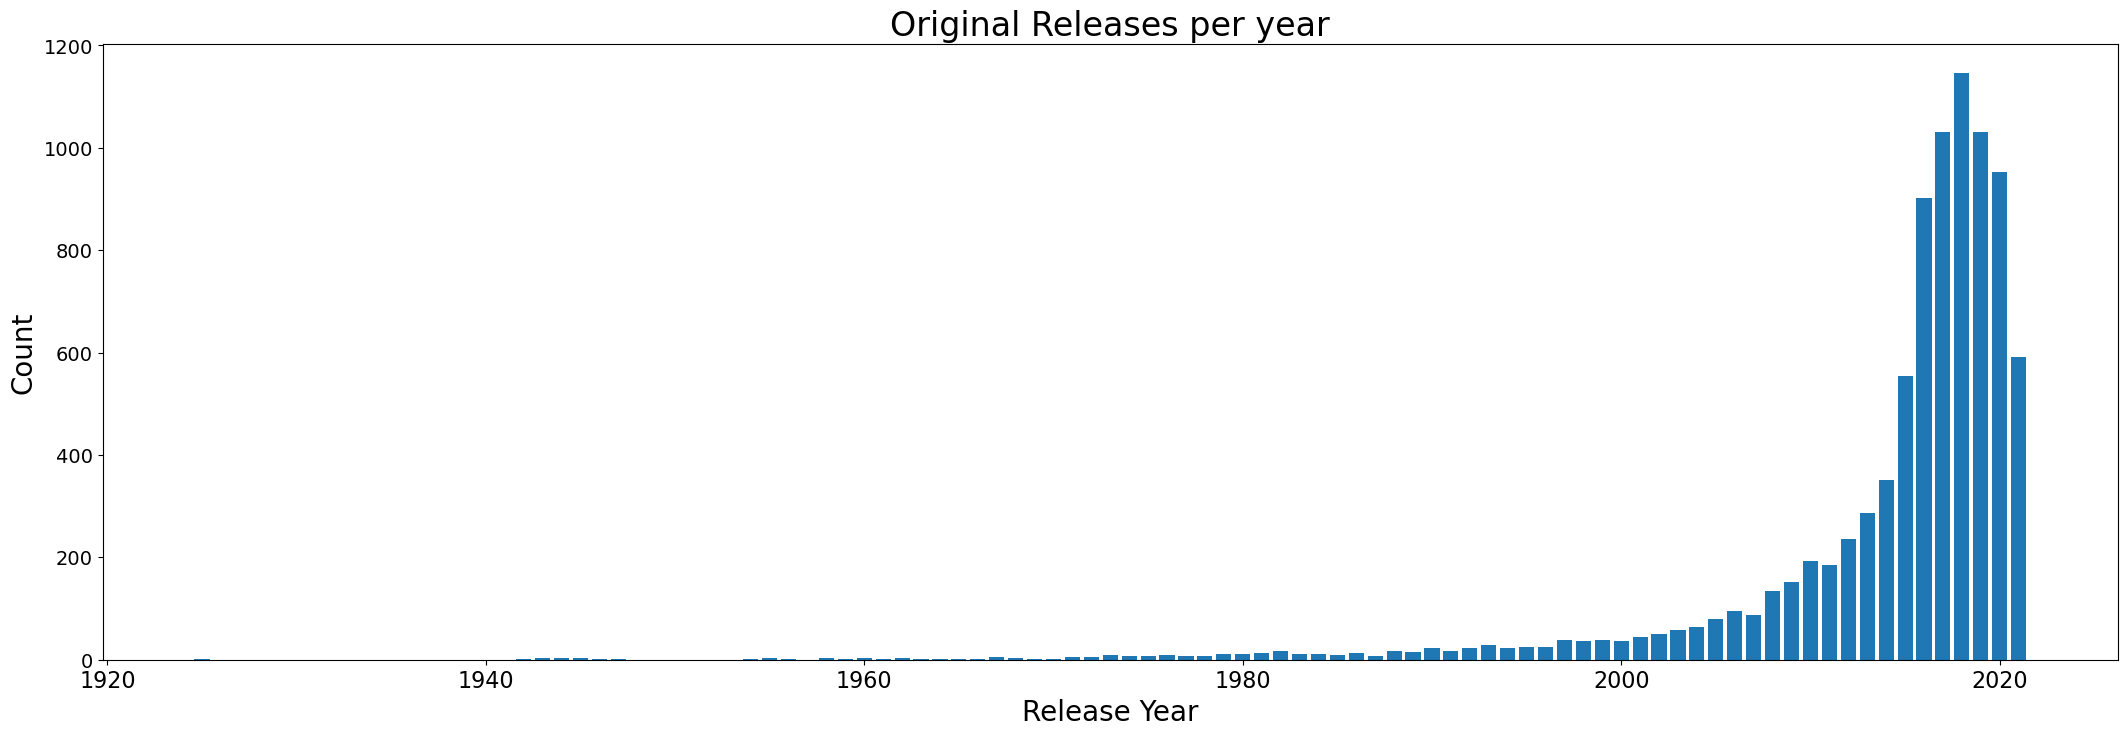

In [293]:
plt.figure(figsize=(26,8))
plt.bar(g.index,g)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Original Releases per year", fontsize=24)
plt.show()

In [45]:
ryear_count=nf.groupby(["release_year", "type"]).size().reset_index()

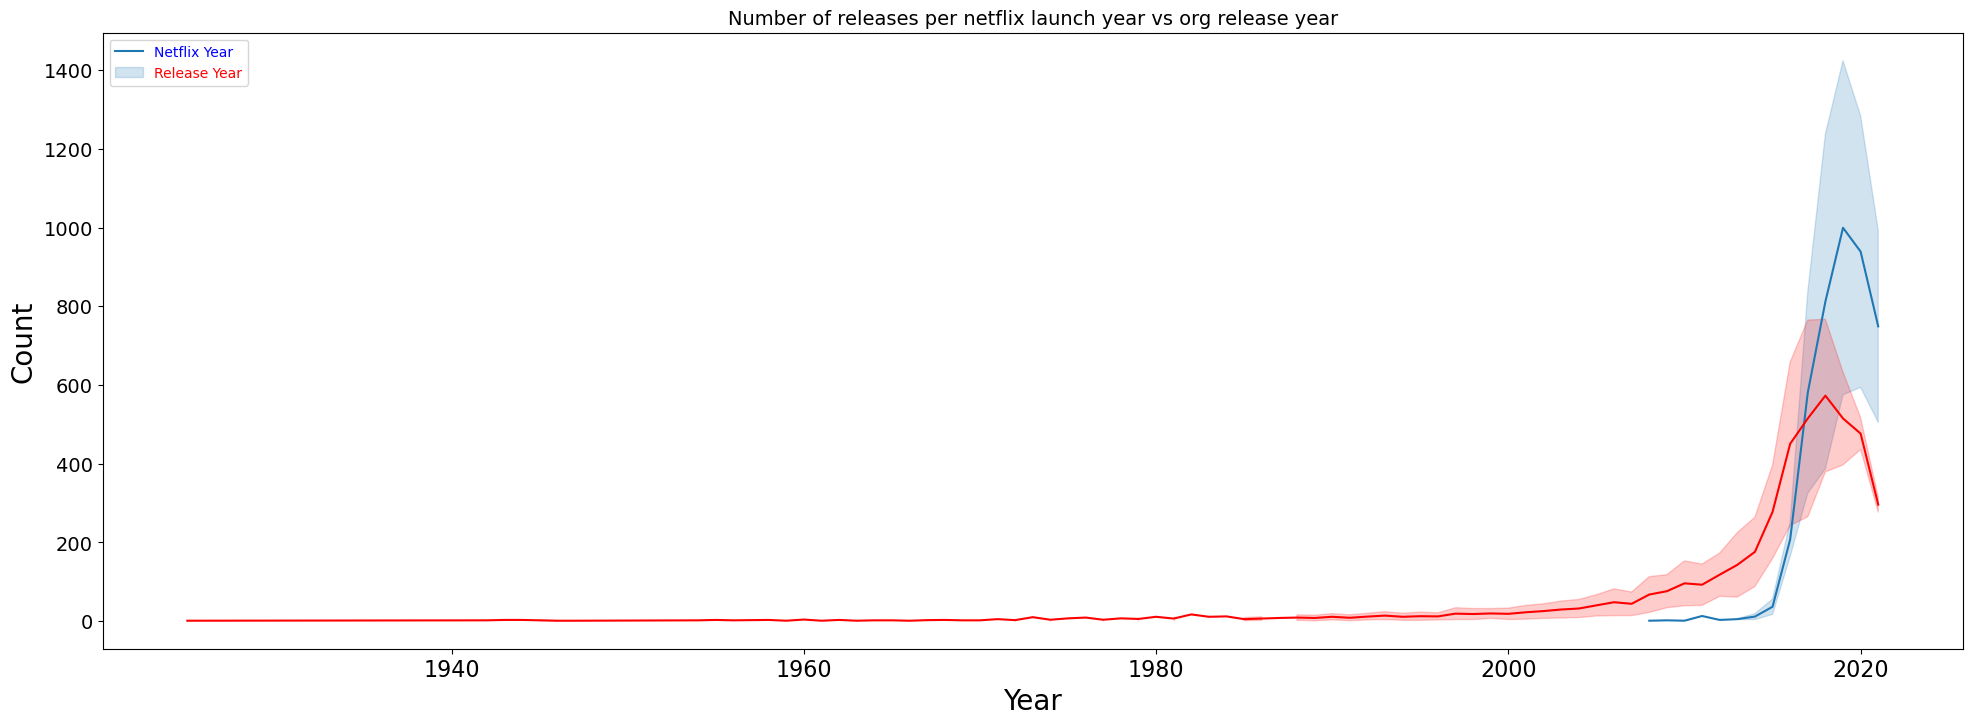

In [297]:
plt.figure(figsize=(24,8))
sns.lineplot(x=year_count["year"],y=year_count[0])
sns.lineplot(x=ryear_count["release_year"], y=ryear_count[0],color="r")
plt.legend(["Netflix Year","Release Year"], loc="upper left", labelcolor=["blue","red"])
plt.title("Number of releases per netflix launch year vs org release year", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

In [47]:
nf["rating"].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

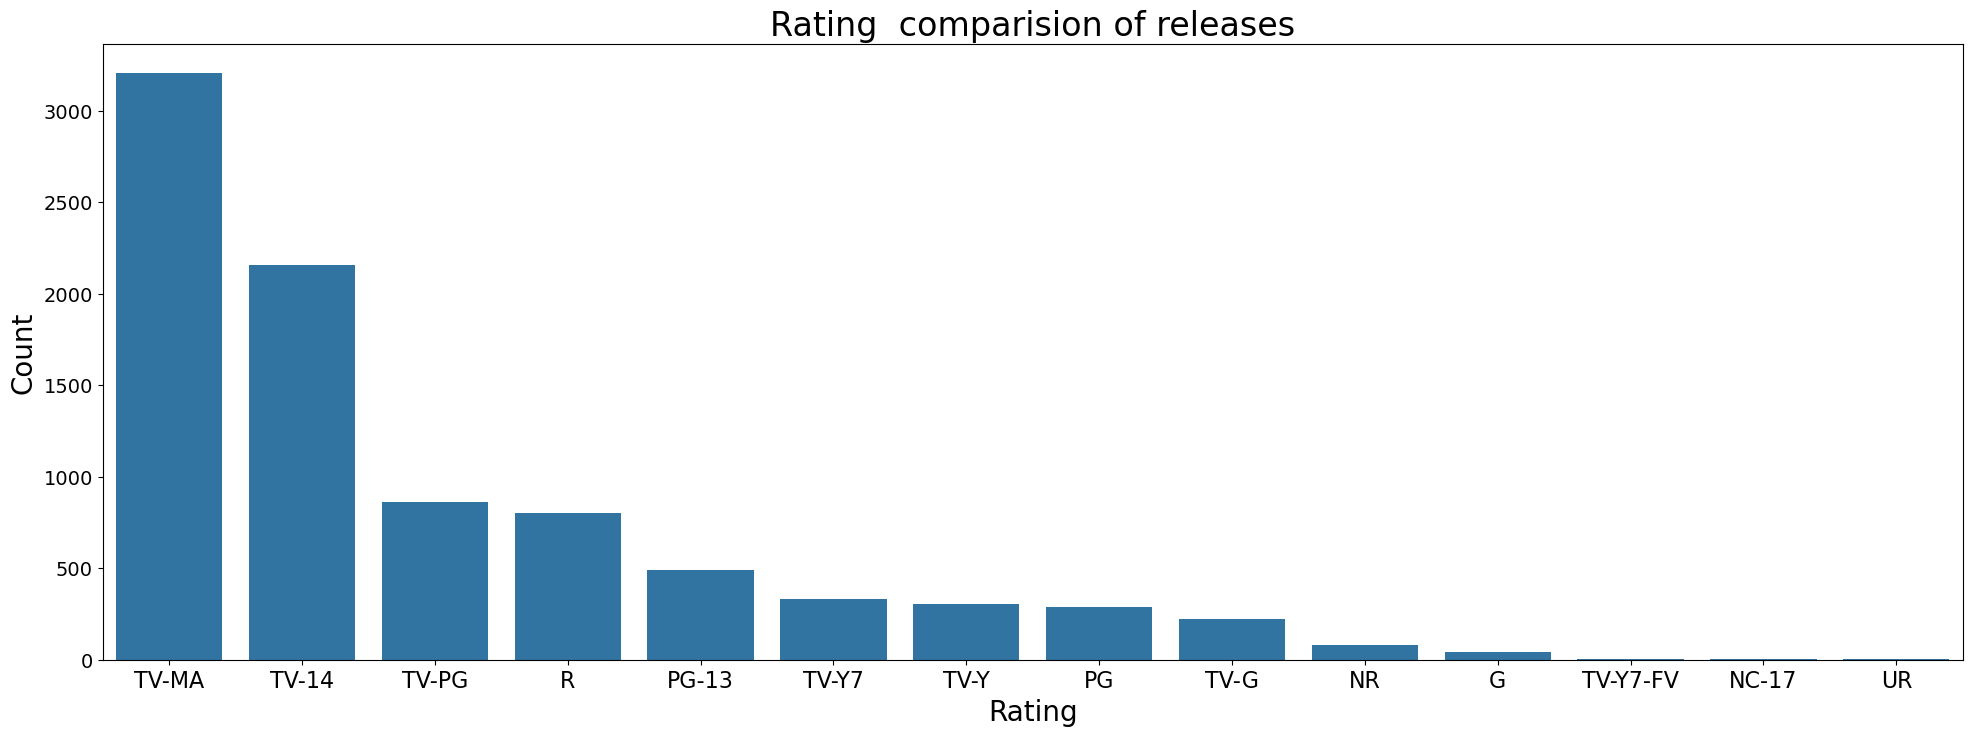

In [49]:
plt.figure(figsize=(24,8))
sns.countplot(data=nf,x="rating",order=nf["rating"].value_counts().index)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Rating  comparision of releases",fontsize=24)
plt.show()

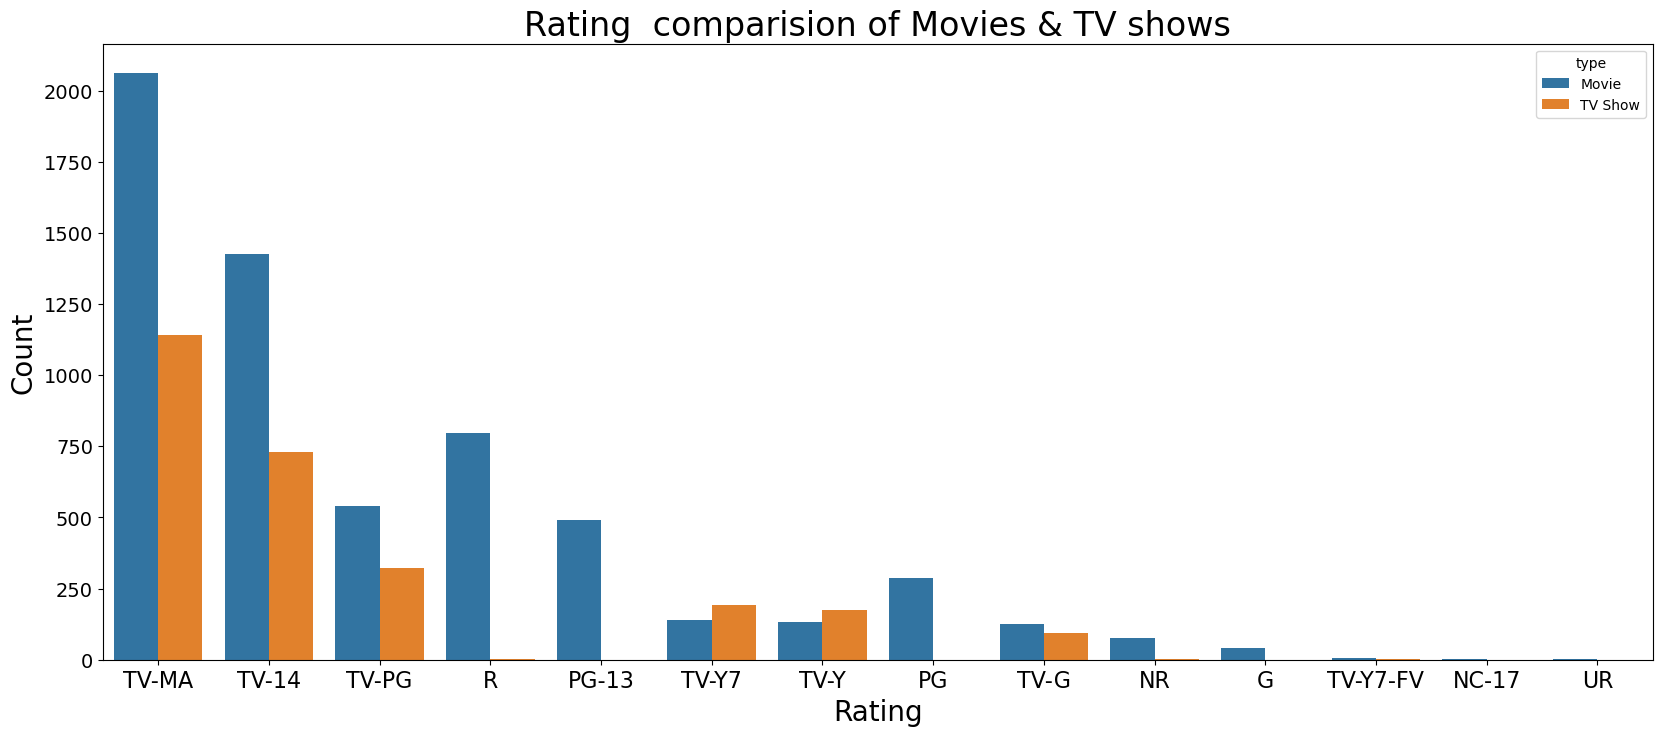

In [303]:
plt.figure(figsize=(20,8))
sns.countplot(data=nf,x="rating",order=nf["rating"].value_counts().index,hue="type")
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Rating  comparision of Movies & TV shows",fontsize=24)
plt.show()

In [51]:
nf_country = nf.copy()

In [53]:
nf_country['country']=nf_country['country'].str.split(',')

In [55]:
nf_country = nf_country.explode('country')

In [57]:
nf_country['country'] = nf_country['country'].str.lstrip()

In [59]:
nf_country.shape

(10833, 15)

In [61]:
nf_country.isna().sum()

show_id            0
type               0
title              0
director        2957
cast            1006
country          829
date_added       101
release_year       0
rating             0
duration           0
listed_in          0
description        0
year             101
month            101
weekday          101
dtype: int64

In [63]:
nf_country.dropna(subset=['country'],inplace=True)

In [65]:
nf_country.isna().sum()

show_id            0
type               0
title              0
director        2550
cast             852
country            0
date_added        98
release_year       0
rating             0
duration           0
listed_in          0
description        0
year              98
month             98
weekday           98
dtype: int64

In [67]:
nf_country.drop(index=nf_country.loc[nf_country['country']==""].index,inplace=True)

In [69]:
nf_country["country"].value_counts()

country
United States     3680
India             1046
United Kingdom     803
Canada             445
France             391
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 122, dtype: int64

In [71]:
nf_country_grp = nf_country_grp=nf_country.groupby('country')[["title"]].agg("count")


In [73]:
print(nf_country_grp)

              title
country            
Afghanistan       1
Albania           1
Algeria           2
Angola            1
Argentina        91
...             ...
Vatican City      1
Venezuela         4
Vietnam           7
West Germany      5
Zimbabwe          3

[122 rows x 1 columns]


In [75]:
top_countries_list=nf_country_grp.index
top_countries=nf_country.loc[nf_country["country"].isin(top_countries_list)]

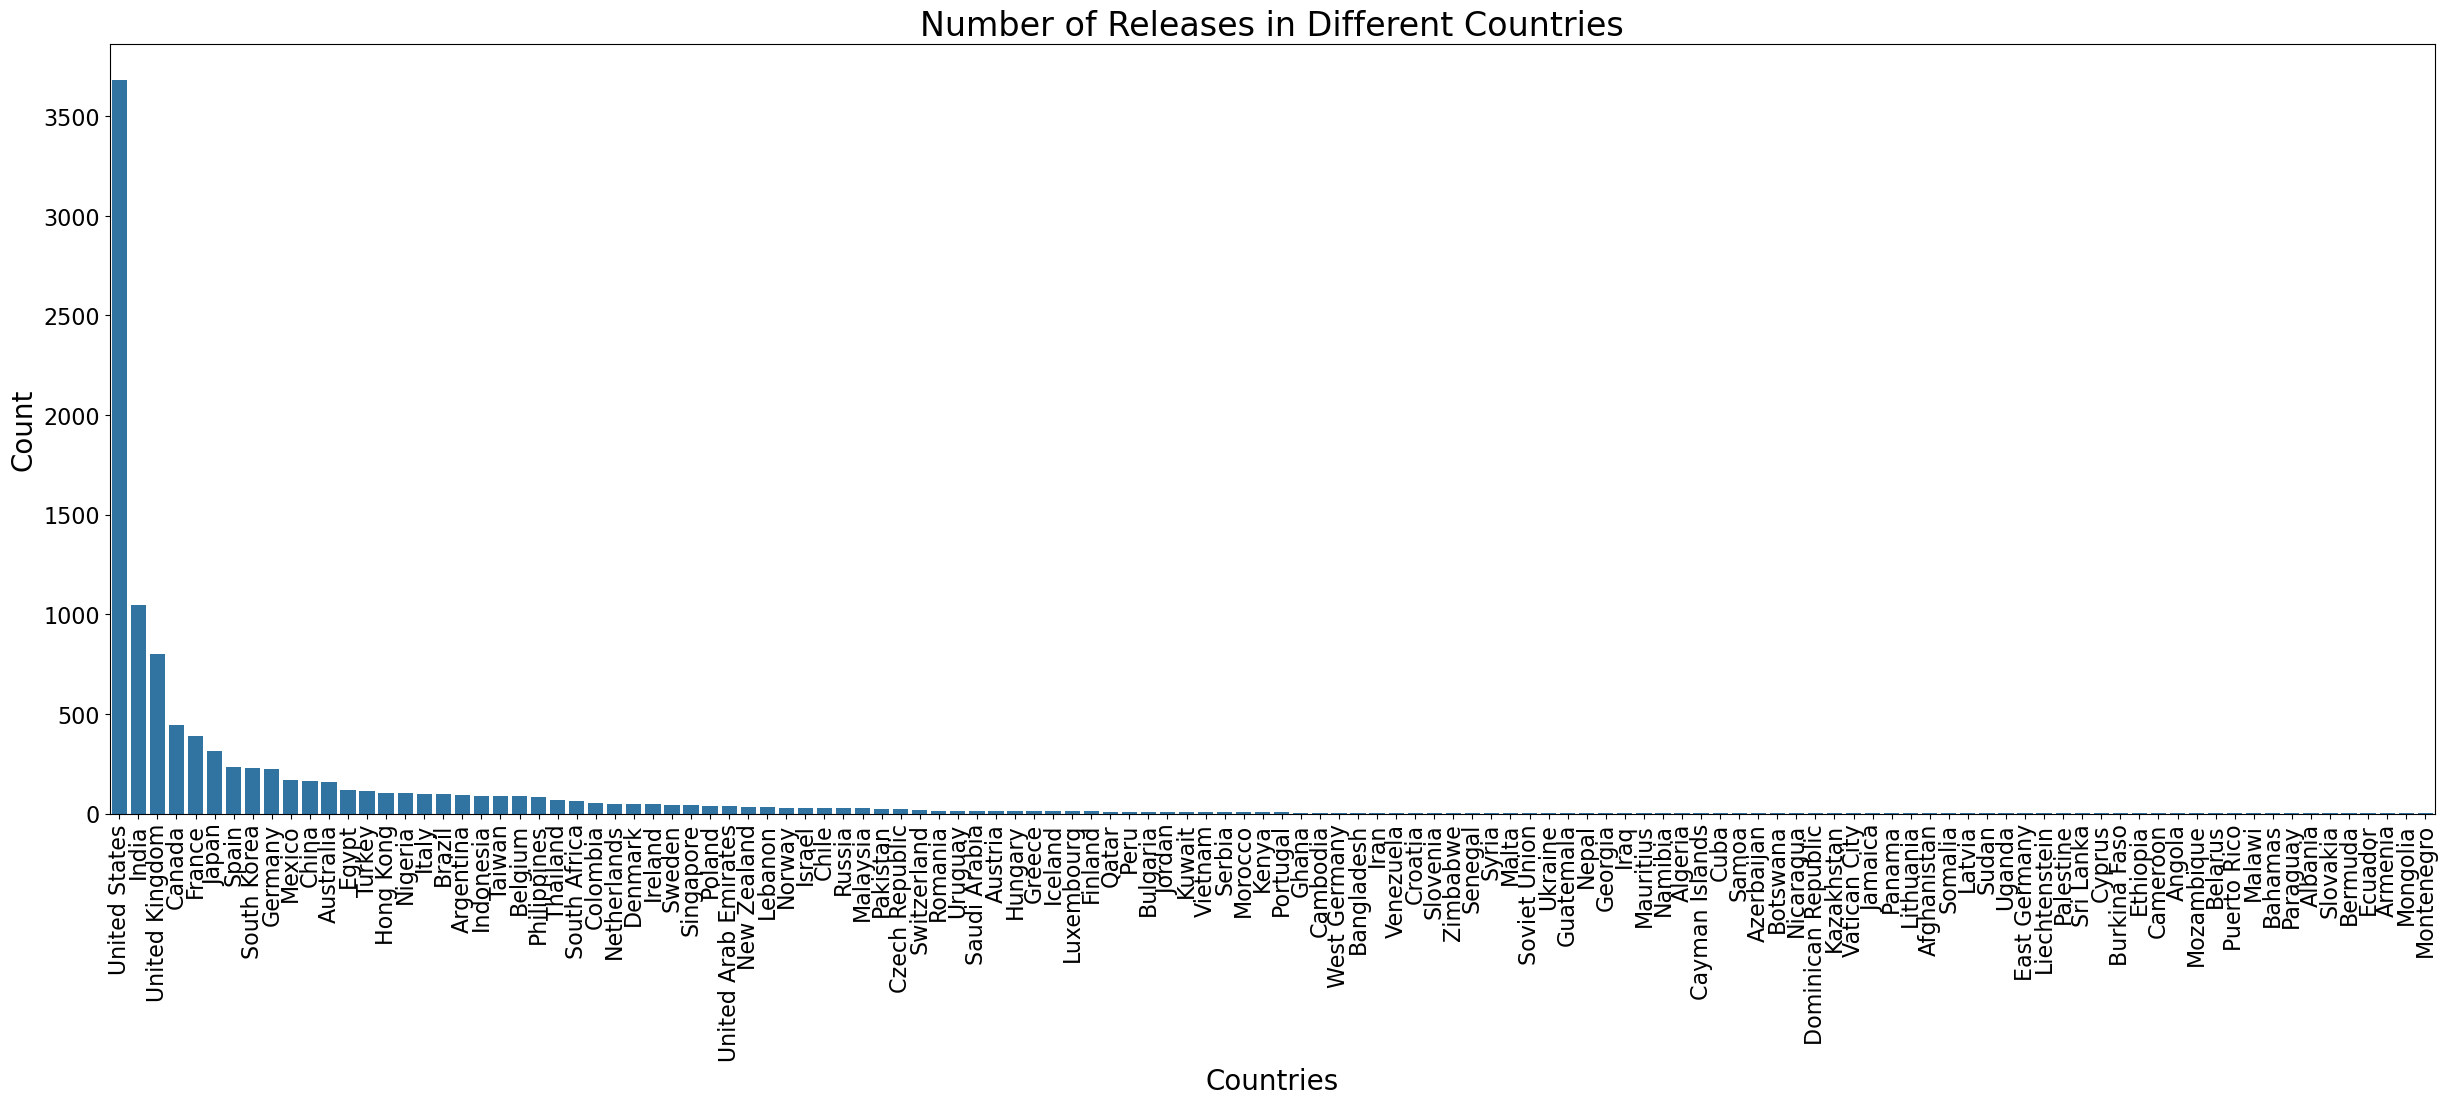

In [77]:
plt.figure(figsize=(30,10))
sns.countplot(data=top_countries,x="country",order=top_countries["country"].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Number of Releases in Different Countries", fontsize=24)
plt.yticks(fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

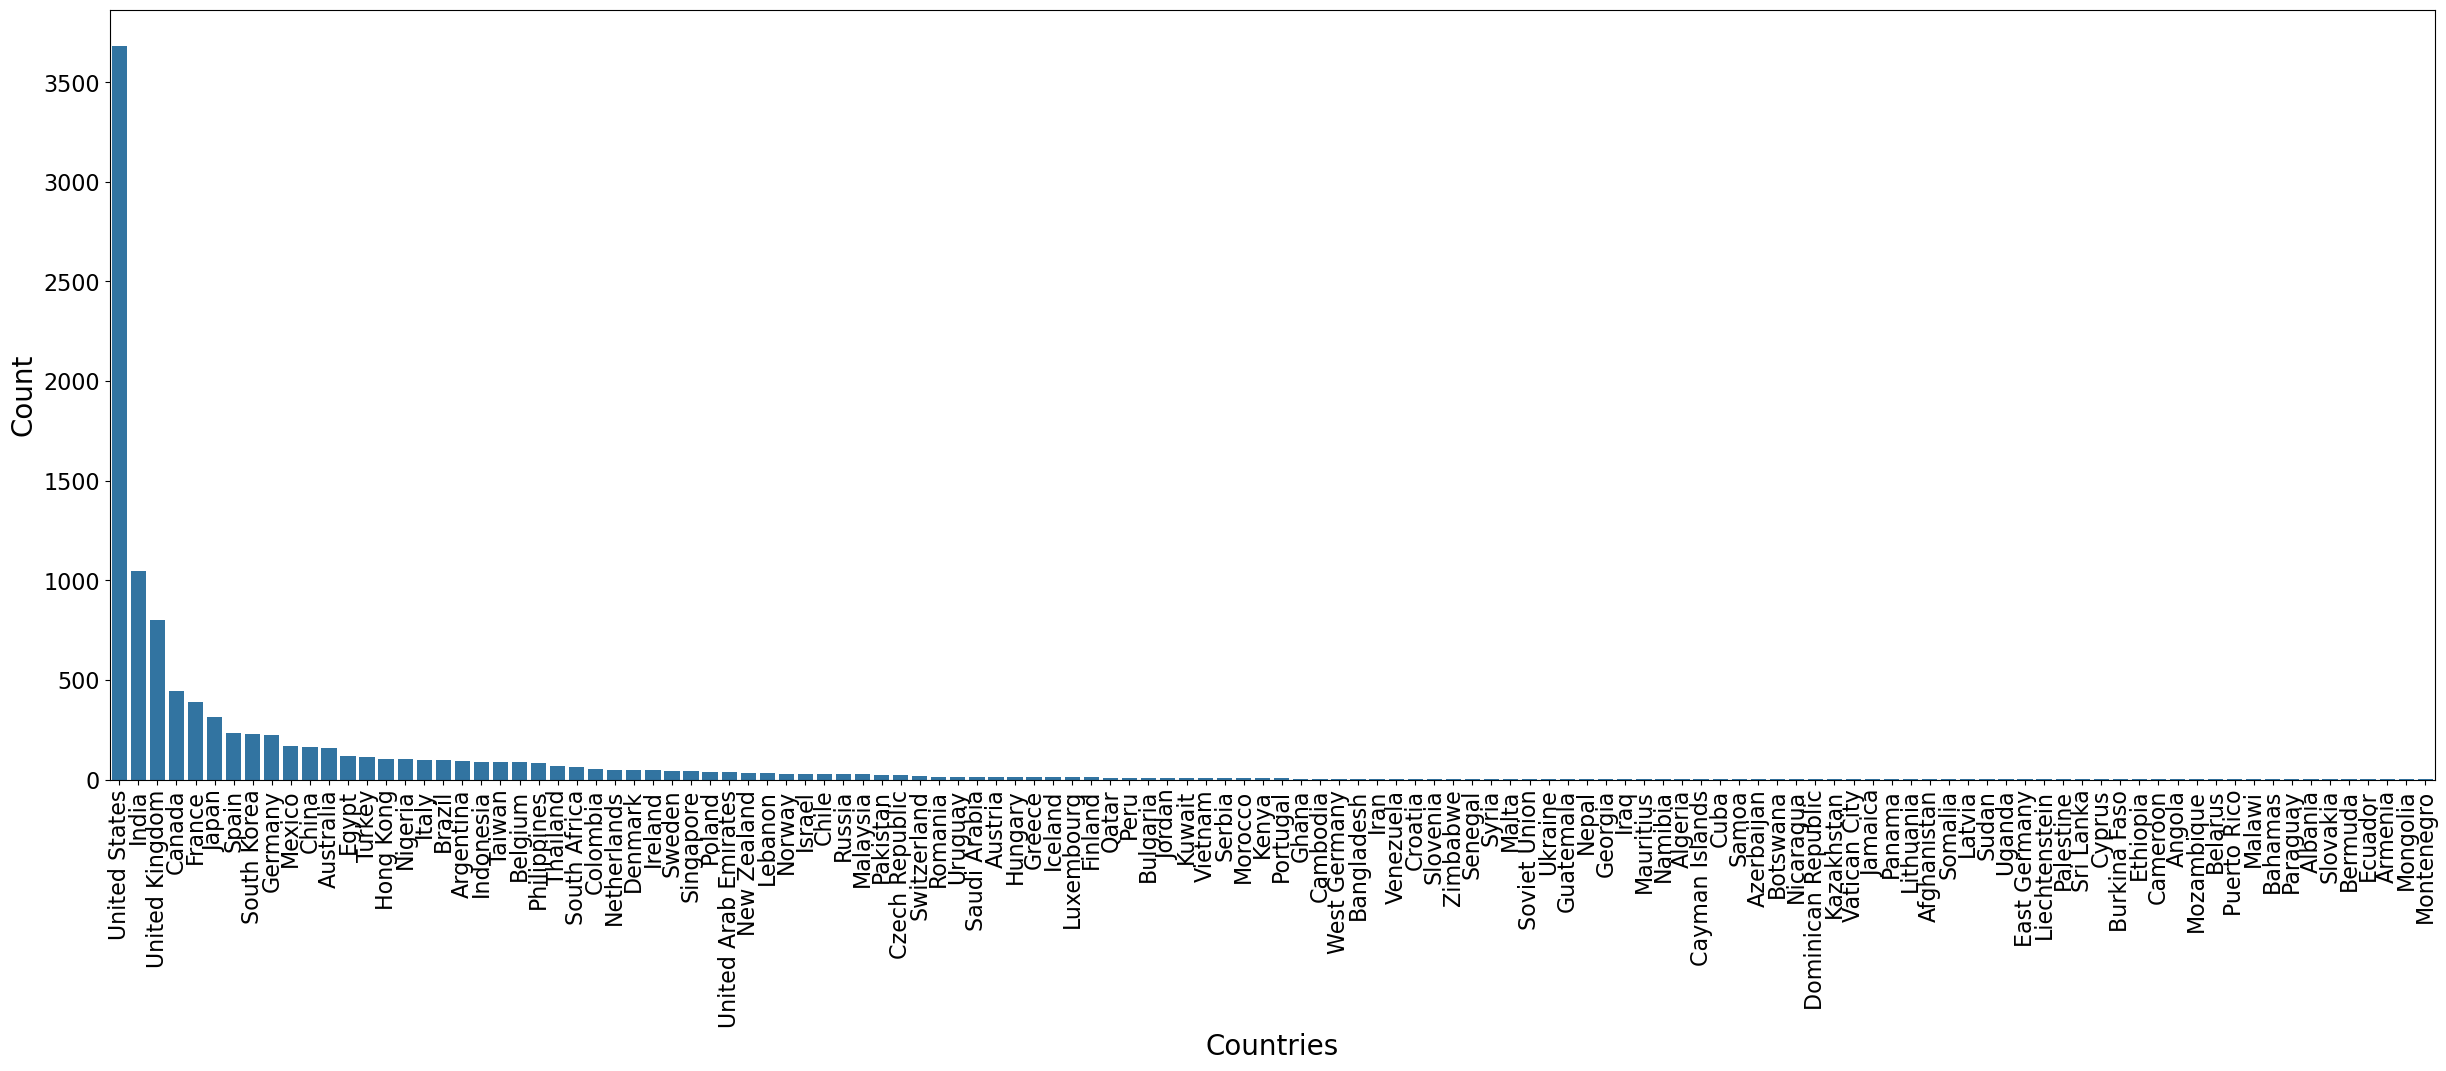

In [333]:
plt.figure(figsize=(30,10))
sns.countplot(data=top_countries,x="country",order=top_countries["country"].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Countries", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)


In [85]:
nf_cast=nf.copy()
nf_cast.shape

(8790, 15)

In [87]:
nf_cast["cast"]=nf_cast["cast"].str.split(",")

In [95]:
nf_cast=nf_cast.explode("cast")

In [97]:
nf_cast.shape

(64841, 15)

In [99]:
nf_cast.isna().sum()

show_id             0
type                0
title               0
director        18913
cast              825
country          5050
date_added        621
release_year        0
rating              0
duration            0
listed_in           0
description         0
year              621
month             621
weekday           621
dtype: int64

In [101]:
nf_cast.dropna(subset=["cast","country"],inplace=True)

In [103]:
nf_cast.isna().sum()

show_id             0
type                0
title               0
director        16409
cast                0
country             0
date_added        605
release_year        0
rating              0
duration            0
listed_in           0
description         0
year              605
month             605
weekday           605
dtype: int64

In [105]:
cast_tv=nf_cast.loc[nf_cast["type"]=="TV Show"]
cast_tv.shape

(17303, 15)

In [107]:
cast_movies=nf_cast.loc[nf_cast["type"]=="Movie"]
cast_movies.shape

(41817, 15)

In [109]:
top_cast_tv = cast_tv.groupby("cast")[["title"]].agg("count").nlargest(30, "title")
top_cast_all = nf_cast.groupby("cast")[["title"]].agg("count").nlargest(30, "title")
top_cast_movies = cast_movies.groupby("cast")[["title"]].agg("count").nlargest(30, "title")


In [111]:

top_actors_all = nf_cast[nf_cast["cast"].isin(top_cast_all.index)]
top_cast_tv = nf_cast[nf_cast["cast"].isin(top_cast_tv.index)]
top_actors_movies = nf_cast[nf_cast["cast"].isin(top_cast_movies.index)]


In [119]:
plt.figure(figsize=(24,8))
sns.countplot(data=top_actors_tv,x="cast",order=top_actors_tv['cast'].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Actors", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Top Actors of TV Shows", fontsize=26)
plt.tight_layout()
plt.show()


KeyError: 'cast'

<Figure size 2400x800 with 0 Axes>

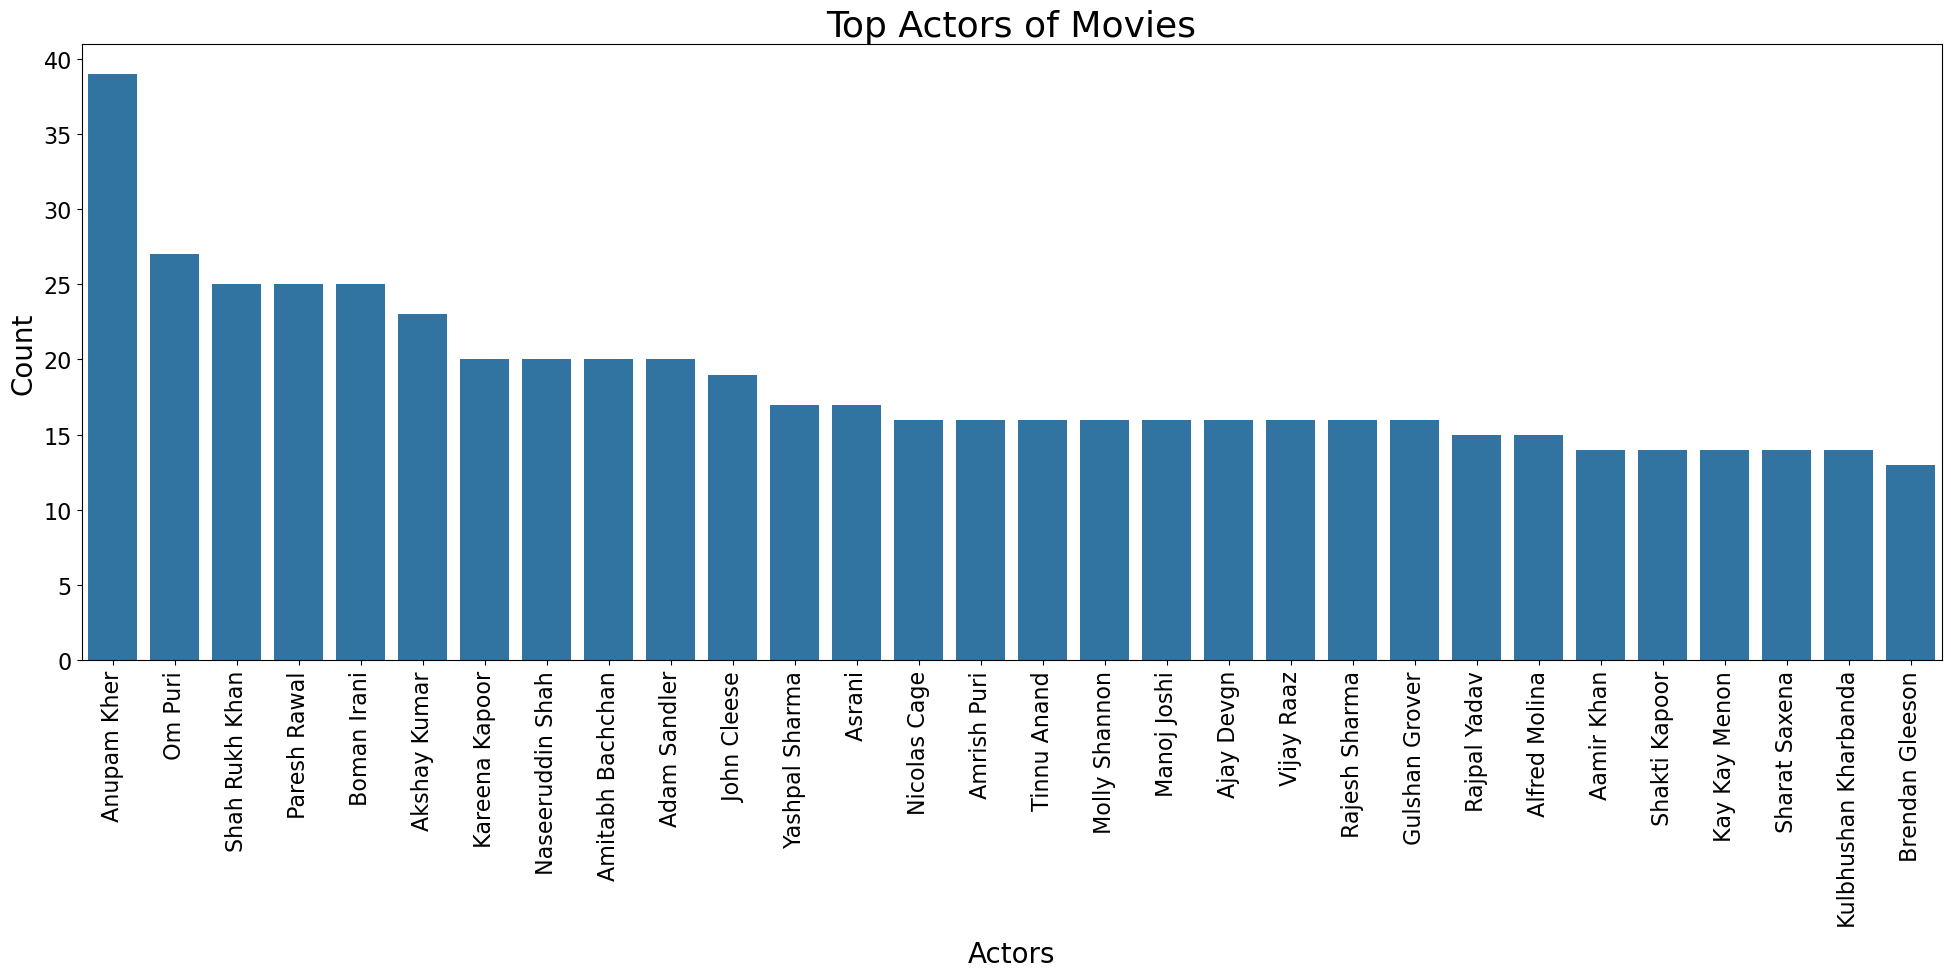

In [451]:
plt.figure(figsize=(24,8))
sns.countplot(data=top_actors_movies,x="cast",order=top_actors_movies['cast'].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Actors", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)
plt.title("Top Actors of Movies", fontsize=26)
plt.show()

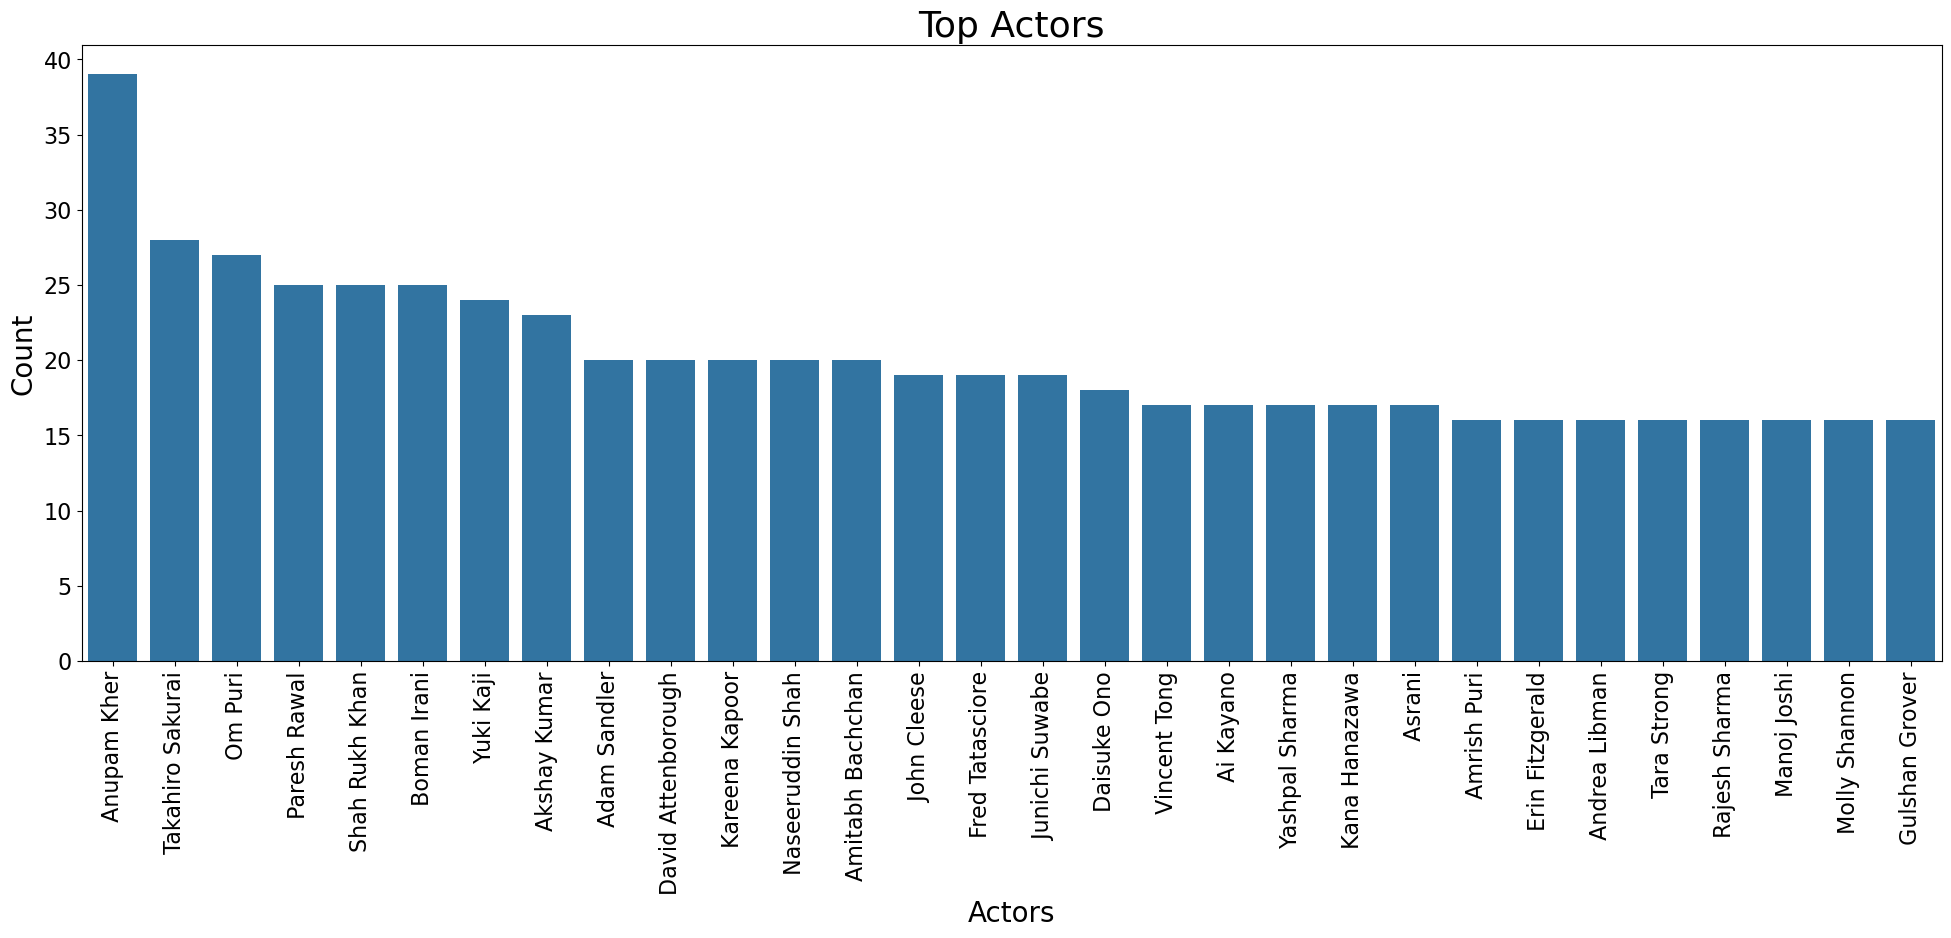

In [453]:
plt.figure(figsize=(24,8))
sns.countplot(data=top_actors_all,x="cast",order=top_actors_all['cast'].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Actors", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)
plt.title("Top Actors", fontsize=26)
plt.show()

In [457]:
nf_genre=nf.copy()

In [459]:
nf_genre.shape

(8790, 15)

In [461]:
nf_genre["listed_in"]=nf_genre["listed_in"].str.split(",")

In [463]:
nf_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021.0,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021.0,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,2021.0,September,Friday


In [465]:
nf_genre=nf_genre.explode("listed_in")

In [467]:
nf_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,weekday
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0,September,Friday


In [469]:
nf_genre.shape

(19294, 15)

In [471]:
nf_genre["listed_in"].value_counts()

listed_in
 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

In [475]:
top_genre_list=nf_genre.groupby(["listed_in"]).size().nlargest(30).index
top_genre=nf_genre.loc[nf_genre["listed_in"].isin(top_genre_list)]

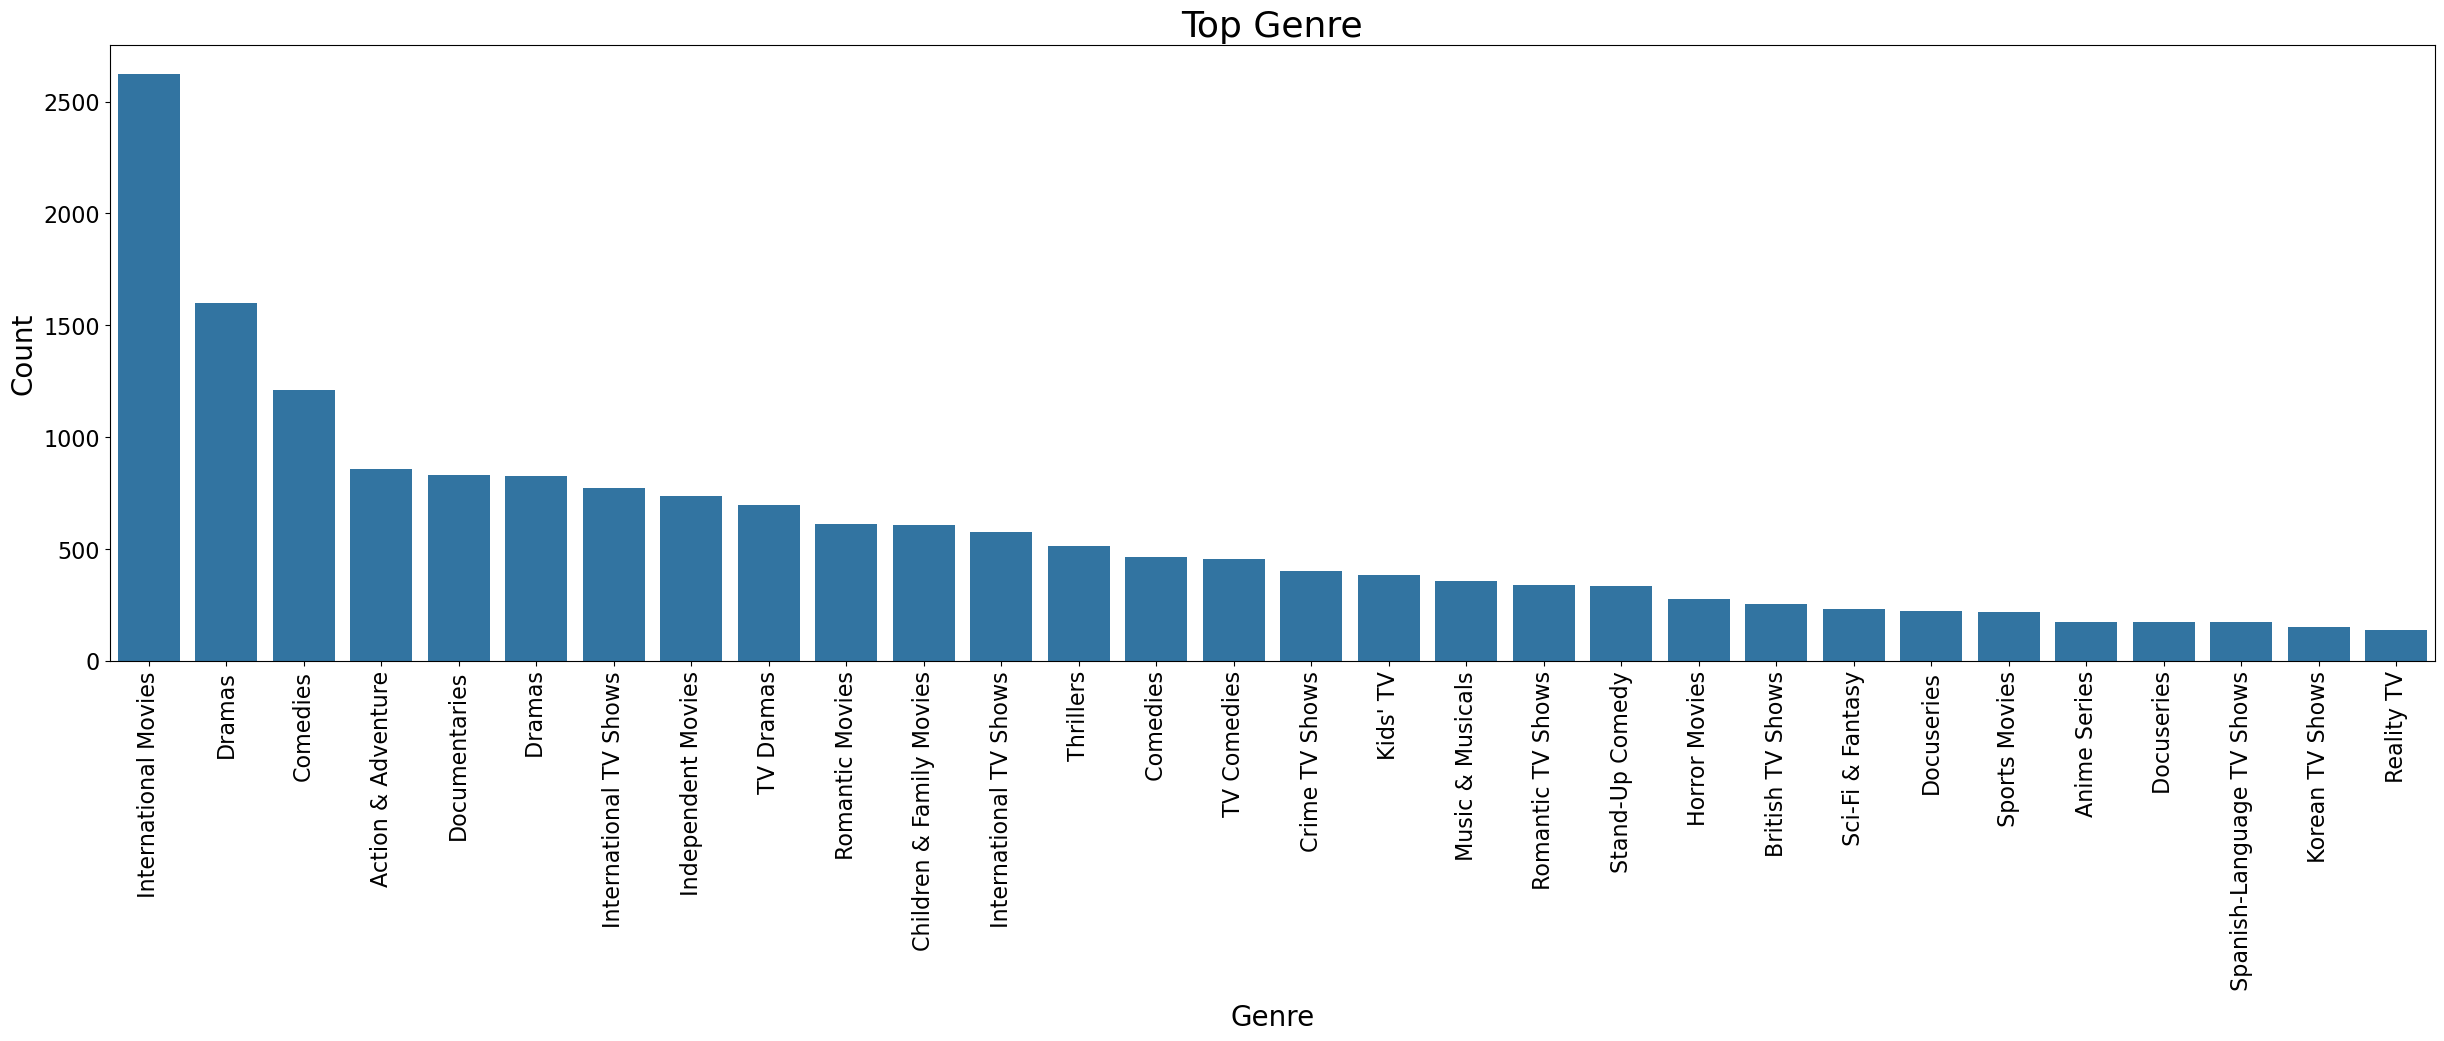

In [477]:
plt.figure(figsize=(30,8))
sns.countplot(x=top_genre["listed_in"],order=top_genre["listed_in"].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Genre", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)
plt.title("Top Genre", fontsize=26)
plt.show()

In [479]:
nf["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4526, dtype: int64

In [481]:
nf_dir=nf.copy()

In [483]:
nf_dir.shape

(8790, 15)

In [485]:
nf_dir.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added        88
release_year       0
rating             0
duration           0
listed_in          0
description        0
year              88
month             88
weekday           88
dtype: int64

In [491]:
nf_dir.dropna(subset="director",inplace=True)

In [493]:
nf_dir.isna().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        5
release_year      0
rating            0
duration          0
listed_in         0
description       0
year              5
month             5
weekday           5
dtype: int64

In [495]:
top_dir_list=nf_dir["director"].value_counts().nlargest(30).index

In [497]:
top_dir=nf_dir.loc[nf["director"].isin(top_dir_list)]

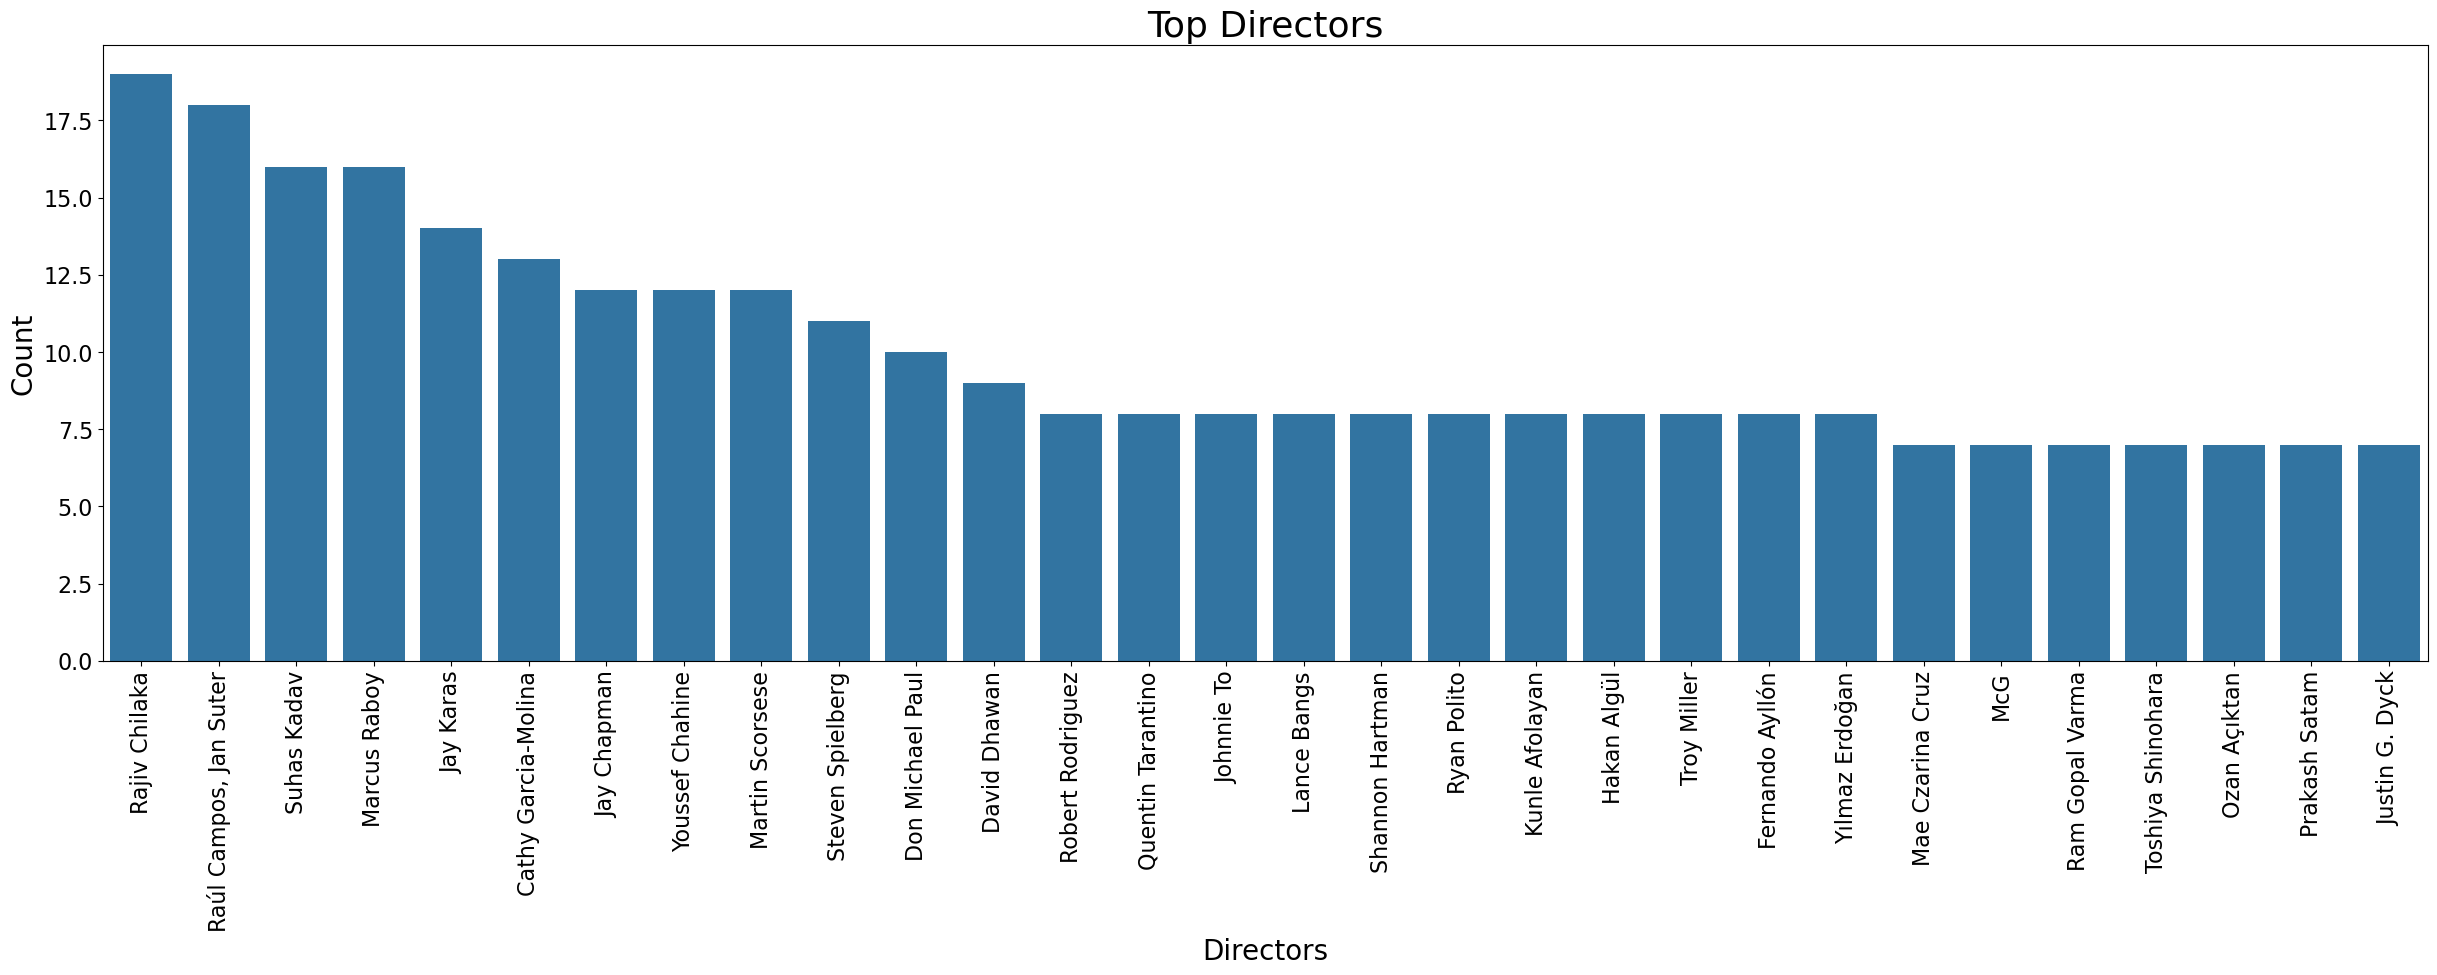

In [499]:
plt.figure(figsize=(30,8))
sns.countplot(x=top_dir["director"],order=top_dir["director"].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Directors", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)
plt.title("Top Directors", fontsize=26)
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=top_dir["director"],order=top_dir["director"].value_counts().index)
plt.xticks(rotation=90, fontsize=16)
plt.xlabel("Directors", fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel("Count", fontsize=20)
plt.title("Top Directors", fontsize=26)
plt.show()